In [18]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [19]:
Train = pd.read_csv("Train_merged.csv")

C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [20]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19731 entries, 0 to 19730
Data columns (total 51 columns):
Unnamed: 0               19731 non-null int64
Agreement_ID             19731 non-null int64
Foreclosure              19731 non-null int64
Customer_ID              19731 non-null int64
MOB                      19731 non-null int64
Loan_Amt                 19731 non-null object
NET_DISBURSED_AMT        19731 non-null object
Interest_Start_Date      19731 non-null object
Current_ROI              19731 non-null float64
Original_ROI             19731 non-null float64
Current_Tenure           19731 non-null float64
Original_Tenure          19731 non-null int64
Due_Day                  19731 non-null int64
Authorization_Date       19731 non-null object
City                     19731 non-null object
Pre_EMI_Due_Amt          19731 non-null float64
Pre_EMI_Received_Amt     19731 non-null float64
PRE_EMI_OS_AMOUNT        19731 non-null float64
EMI_Due_Amt              19731 non-null float6

In [21]:
from sklearn import preprocessing


# encode categorical variables using Label Encoder

# select all categorical variables
df_categorical = Train.select_dtypes(include=['object'])
df_categorical.head()

,Loan_Amt,NET_DISBURSED_AMT,Interest_Start_Date,Authorization_Date,City,Last_Receipt_Date,Product,NPA_In_Last_Month,NPA_In_Current_Month,Gender,Marital_Status,Qualification
0,"1,17,10,107.24","1,17,10,107.24",30-Aug-10,29-Aug-10,MUMBAI,05-May-14,HL,NaN,NaN,M,M,POSTGRAD
1,"1,92,90,253.32","1,92,90,253.32",15-Sep-10,15-Sep-10,MUMBAI,01-Nov-13,HL,NaN,NaN,M,M,POSTGRAD
2,"39,33,395.00","39,33,395.00",01-Nov-10,02-Nov-10,MUMBAI,05-Aug-17,HL,NaN,NaN,M,M,GRAD
3,"1,00,22,587.71","1,00,22,587.71",06-Oct-10,06-Oct-10,THANE,02-May-18,HL,NaN,NaN,M,M,POSTGRAD
4,"77,55,937.31","77,55,937.31",26-Oct-10,26-Oct-10,MUMBAI,05-Apr-18,HL,NaN,NaN,M,M,UG


In [22]:
TrainX_merged = pd.read_csv("TrainX_merged.csv")

In [23]:
df_categorical = df_categorical[['City','Product','Gender','Marital_Status','Qualification']]

In [24]:
df_categorical.Gender = df_categorical.Gender.astype('str')

In [25]:
df_categorical.Marital_Status = df_categorical.Marital_Status.astype('str')

In [26]:
df_categorical.Qualification = df_categorical.Qualification.astype('str')

In [27]:
# apply Label encoder to df_categorical

le = preprocessing.LabelEncoder()
df_categorical = df_categorical.apply(le.fit_transform)
df_categorical.head()

,City,Product,Gender,Marital_Status,Qualification
0,145,0,1,0,5
1,145,0,1,0,5
2,145,0,1,0,2
3,222,0,1,0,5
4,145,0,1,0,7


In [155]:
Train_data = pd.concat([TrainX_merged, df_categorical],axis = 1)

In [156]:
Train_data = Train_data.iloc[:,1:]

In [157]:
Train_Amt_DF = Train.loc[:,['Pre_EMI_Due_Amt','Pre_EMI_Received_Amt','PRE_EMI_OS_AMOUNT','EMI_Due_Amt',
                          'EMI_Received_Amt' ,'EMI_OS_AMOUNT','Excess_Available',
                            'Excess_Adjusted_Amt','Balance_Excess','Net_Receivable','Outstanding_Principal'
                            ,'Paid_Principal','Paid_Interest','Month_Opening']]

In [158]:
Train_Amt_DF = round(Train_Amt_DF/100000,0)

In [159]:
Train_data = pd.concat([Train_data,Train_Amt_DF],axis = 1)

In [160]:
Train_Numeric = Train.loc[:,['DPD','FOIR','No_Of_Dependent'
                            ,'Pre_Job_Years']]  

In [161]:
Train_data = pd.concat([Train_data,Train_Numeric],axis = 1)

In [162]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19731 entries, 0 to 19730
Data columns (total 29 columns):
Net_Disbursed_Amt        19731 non-null float64
ROI_Change_Ratio         19731 non-null float64
Tenure_Ratio             19731 non-null float64
Tenure_Change_Ratio      19731 non-null float64
Foreclosure              19731 non-null int64
Net_LTV                  19731 non-null float64
City                     19731 non-null int32
Product                  19731 non-null int32
Gender                   19731 non-null int32
Marital_Status           19731 non-null int32
Qualification            19731 non-null int32
Pre_EMI_Due_Amt          19731 non-null float64
Pre_EMI_Received_Amt     19731 non-null float64
PRE_EMI_OS_AMOUNT        19731 non-null float64
EMI_Due_Amt              19731 non-null float64
EMI_Received_Amt         19731 non-null float64
EMI_OS_AMOUNT            19731 non-null float64
Excess_Available         19731 non-null float64
Excess_Adjusted_Amt      19731 non-null

In [163]:
Train_data[['No_Of_Dependent','Pre_Job_Years']].describe()

,No_Of_Dependent,Pre_Job_Years
count,5949.000000,1407.000000
mean,0.522609,4.607676
std,1.102681,6.443729
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,2.000000
75%,0.000000,7.000000
max,10.000000,37.000000


In [164]:
Train_data['No_Of_Dependent'] = Train_data['No_Of_Dependent'].fillna(-1)

In [165]:
Train_data['Pre_Job_Years'] = Train_data['Pre_Job_Years'].fillna(-1)

In [166]:
# Importing train-test-split 
from sklearn.model_selection import train_test_split

In [167]:
# Putting feature variable to X
X = Train_data.drop(['Foreclosure'],axis=1)

# Putting response variable to y
y = Train_data['Foreclosure']

In [168]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state = 99)
X_train.head()

,Net_Disbursed_Amt,ROI_Change_Ratio,Tenure_Ratio,Tenure_Change_Ratio,Net_LTV,City,Product,Gender,Marital_Status,Qualification,...,Balance_Excess,Net_Receivable,Outstanding_Principal,Paid_Principal,Paid_Interest,Month_Opening,DPD,FOIR,No_Of_Dependent,Pre_Job_Years
16257,13.51,-0.10,0.02,-0.17,37.83,261,1,2,2,8,...,0.0,0.0,13.0,0.0,1.0,13.0,0.0,0.57,-1.0,-1.0
7515,30.03,0.00,0.10,0.00,70.92,90,2,1,1,7,...,0.0,0.0,29.0,1.0,7.0,29.0,0.0,0.30,0.0,-1.0
1993,23.87,0.00,0.05,0.00,54.12,90,2,0,0,5,...,0.0,0.0,23.0,0.0,3.0,23.0,0.0,0.49,0.0,-1.0
2239,27.58,-0.04,0.22,-0.03,73.06,2,0,1,0,7,...,0.0,0.0,25.0,3.0,13.0,25.0,0.0,0.49,2.0,-1.0
16897,15.51,0.00,0.03,0.00,85.15,247,2,2,2,8,...,0.0,0.0,15.0,0.0,1.0,15.0,0.0,0.34,-1.0,-1.0


In [189]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

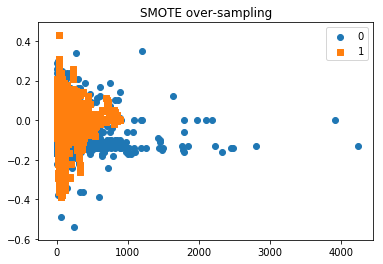

In [190]:
#!pip install imblearn
import imblearn
import numpy as np
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X_train,
                               y_train)

plot_2d_space(X_sm, y_sm, 'SMOTE over-sampling')

In [191]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_sm, y_sm)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [192]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.99      0.88      0.93      5354
           1       0.44      0.92      0.60       566

   micro avg       0.88      0.88      0.88      5920
   macro avg       0.72      0.90      0.76      5920
weighted avg       0.94      0.88      0.90      5920



In [193]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[4697  657]
 [  48  518]]
0.8809121621621622


In [228]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 15

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_sm, y_sm)

GridSearchCV(cv=15, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(1, 40)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [229]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head(100)

C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split10_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.w

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,params,rank_test_score,split0_test_score,split0_train_score,split10_test_score,...,split7_test_score,split7_train_score,split8_test_score,split8_train_score,split9_test_score,split9_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.045995,0.000796,0.843149,0.843189,1,{'max_depth': 1},39,0.774136,0.848122,0.855781,...,0.850417,0.842672,0.834327,0.843822,0.855781,0.842246,0.005609,0.000980,0.022325,0.001596
1,0.077418,0.000527,0.869496,0.869536,2,{'max_depth': 2},38,0.796782,0.874734,0.881406,...,0.878427,0.868901,0.862932,0.870008,0.880810,0.868688,0.006048,0.000493,0.022935,0.001640
2,0.103023,0.000466,0.881497,0.881577,3,{'max_depth': 3},37,0.845054,0.884186,0.890942,...,0.885578,0.881291,0.876043,0.881972,0.890942,0.880865,0.005121,0.000498,0.013023,0.000933
3,0.133233,0.000726,0.926681,0.927734,4,{'max_depth': 4},36,0.882002,0.930725,0.938617,...,0.934446,0.927148,0.927890,0.927702,0.933254,0.927276,0.011192,0.000438,0.015092,0.001064
4,0.156223,0.000529,0.929423,0.930544,5,{'max_depth': 5},35,0.886770,0.933705,0.942193,...,0.936830,0.930043,0.930274,0.930597,0.935042,0.930256,0.003416,0.000495,0.015179,0.000926
5,0.180619,0.000600,0.930695,0.934751,6,{'max_depth': 6},34,0.880215,0.939794,0.945173,...,0.939213,0.933152,0.929082,0.934344,0.933850,0.933663,0.007841,0.000490,0.016542,0.002055
6,0.204359,0.000927,0.936934,0.941257,7,{'max_depth': 7},33,0.880810,0.945031,0.949344,...,0.949940,0.940688,0.938021,0.942136,0.939213,0.940688,0.008789,0.000440,0.017926,0.001256
7,0.227356,0.000726,0.939636,0.945969,8,{'max_depth': 8},32,0.882598,0.949119,0.945769,...,0.953516,0.944180,0.944577,0.945840,0.942193,0.945968,0.008905,0.000438,0.018094,0.001771
8,0.243054,0.000593,0.941822,0.951436,9,{'max_depth': 9},31,0.879023,0.956357,0.947557,...,0.955304,0.950013,0.945769,0.952014,0.943385,0.950226,0.004156,0.000484,0.020055,0.001733
9,0.262441,0.000333,0.944127,0.956400,10,{'max_depth': 10},30,0.874851,0.960104,0.957092,...,0.960667,0.955591,0.952324,0.957336,0.945173,0.952695,0.003268,0.000470,0.021697,0.001813


C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


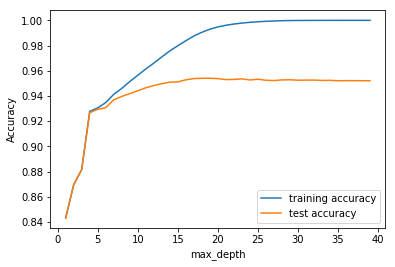

In [230]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [219]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 15

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_sm, y_sm)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_leaf': range(5, 200, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [220]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.wa

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_min_samples_leaf,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.301206,0.001405,0.949650,0.978759,5,{'min_samples_leaf': 5},1,0.897894,0.985544,0.959277,...,0.962639,0.977548,0.966415,0.977399,0.962043,0.976704,0.019179,0.000492,0.025982,0.003413
1,0.263301,0.001203,0.941861,0.955522,25,{'min_samples_leaf': 25},2,0.889948,0.962047,0.949344,...,0.957472,0.952712,0.956677,0.953109,0.955882,0.955494,0.018796,0.000401,0.026120,0.003403
2,0.246451,0.001404,0.935861,0.944673,45,{'min_samples_leaf': 45},3,0.895709,0.952707,0.941398,...,0.951312,0.941238,0.945350,0.942976,0.945548,0.944168,0.013504,0.000491,0.020326,0.004129
3,0.232430,0.001410,0.934510,0.941017,65,{'min_samples_leaf': 65},4,0.899086,0.949478,0.937426,...,0.944952,0.937512,0.946940,0.939499,0.944157,0.940344,0.016344,0.000487,0.018001,0.004342
4,0.218582,0.001008,0.932841,0.938662,85,{'min_samples_leaf': 85},7,0.898292,0.944660,0.940008,...,0.943959,0.936519,0.939984,0.936320,0.941971,0.937910,0.023409,0.000022,0.017339,0.003072


C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


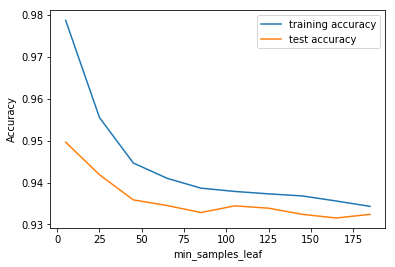

In [221]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [222]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_sm, y_sm)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': range(5, 200, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [223]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head(10)

C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.wa

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_min_samples_split,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.339710,0.001403,0.949611,0.994735,5,{'min_samples_split': 5},1,0.892133,0.997914,0.961263,...,0.964825,0.995082,0.967409,0.993195,0.962440,0.994039,0.030260,0.000801,0.028820,0.001718
1,0.313555,0.001608,0.948379,0.975799,25,{'min_samples_split': 25},2,0.896106,0.982613,0.960469,...,0.962838,0.973823,0.962242,0.974270,0.960254,0.975512,0.021007,0.000488,0.026159,0.003518
2,0.325875,0.002004,0.947107,0.968119,45,{'min_samples_split': 45},3,0.896702,0.974367,0.958482,...,0.960652,0.966918,0.963235,0.966124,0.956479,0.966769,0.012503,0.000636,0.025306,0.003136
3,0.319463,0.001594,0.946829,0.963937,65,{'min_samples_split': 65},4,0.898888,0.971336,0.954311,...,0.960652,0.960610,0.961645,0.961951,0.958665,0.964087,0.020113,0.000494,0.024106,0.003868
4,0.305019,0.001213,0.945239,0.961135,85,{'min_samples_split': 85},5,0.898490,0.969001,0.953317,...,0.959857,0.958375,0.956280,0.957481,0.958267,0.962249,0.010617,0.000411,0.023480,0.004259
5,0.333493,0.001805,0.943371,0.959168,105,{'min_samples_split': 105},8,0.897100,0.967909,0.952721,...,0.956479,0.954798,0.955882,0.956984,0.954690,0.959468,0.026337,0.000401,0.023175,0.004616
6,0.340520,0.002013,0.943650,0.957588,125,{'min_samples_split': 125},7,0.897696,0.967163,0.951728,...,0.956876,0.954550,0.957472,0.955295,0.954491,0.956189,0.030960,0.001093,0.023070,0.004821
7,0.346927,0.001601,0.944087,0.956496,145,{'min_samples_split': 145},6,0.901867,0.965872,0.951728,...,0.955882,0.952017,0.956479,0.954351,0.954491,0.956189,0.034165,0.000488,0.021176,0.004871
8,0.322070,0.001807,0.942299,0.954369,165,{'min_samples_split': 165},9,0.900874,0.962842,0.949146,...,0.953696,0.950228,0.955286,0.953308,0.952504,0.954252,0.017321,0.000402,0.020813,0.004472
9,0.317050,0.002203,0.940431,0.952581,185,{'min_samples_split': 185},10,0.896305,0.961749,0.949146,...,0.952504,0.948242,0.952901,0.951073,0.951312,0.952513,0.033348,0.001947,0.022105,0.004811


C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


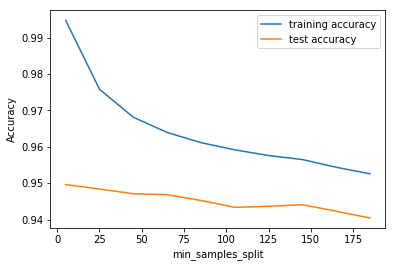

In [224]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [114]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    4.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(5, 15, 5), 'min_samples_leaf': range(50, 150, 50), 'min_samples_split': range(50, 150, 50), 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [115]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.wa

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,rank_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.048931,0.001605,0.935848,0.939813,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",13,...,0.931209,0.940176,0.936640,0.942076,0.935168,0.937195,0.008999,0.000496,0.004853,0.002492
1,0.042518,0.001805,0.935848,0.939813,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",13,...,0.931209,0.940176,0.936640,0.942076,0.935168,0.937195,0.003389,0.000401,0.004853,0.002492
2,0.049130,0.002006,0.934835,0.938835,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",15,...,0.931571,0.939995,0.935554,0.939271,0.932633,0.936923,0.002286,0.000634,0.005448,0.001854
3,0.044511,0.001806,0.934835,0.938835,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",15,...,0.931571,0.939995,0.935554,0.939271,0.932633,0.936923,0.005688,0.001607,0.005448,0.001854
4,0.053348,0.001204,0.938962,0.946528,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",5,...,0.940261,0.947416,0.935192,0.946330,0.941326,0.945973,0.004718,0.000401,0.003174,0.000573
5,0.057763,0.001803,0.938962,0.946528,entropy,10,50,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",5,...,0.940261,0.947416,0.935192,0.946330,0.941326,0.945973,0.003011,0.000400,0.003174,0.000573
6,0.045515,0.001608,0.937948,0.941188,entropy,10,100,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",7,...,0.936278,0.943796,0.935554,0.939271,0.936255,0.940995,0.001865,0.000494,0.003538,0.001492
7,0.045921,0.001399,0.937948,0.941188,entropy,10,100,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",7,...,0.936278,0.943796,0.935554,0.939271,0.936255,0.940995,0.001482,0.000496,0.003538,0.001492
8,0.039116,0.001805,0.936355,0.939740,gini,5,50,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",12,...,0.931209,0.938546,0.938450,0.941714,0.935893,0.937557,0.001562,0.000751,0.004943,0.002105
9,0.037520,0.001199,0.936862,0.939740,gini,5,50,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",11,...,0.933744,0.938546,0.938450,0.941714,0.935893,0.937557,0.001202,0.000396,0.004499,0.002105


In [116]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.9397581637824922
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=100,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [234]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [235]:
# accuracy score
clf_gini.score(X_test,y_test)

0.9402027027027027

In [236]:
import pickle
# save the model to disk
filename = 'edelweiss_decision_tree_model.sav'
pickle.dump(clf_gini, open(filename, 'wb'))